We are going to use the famous iris data set for our KNN example. 


The dataset consists of four attributes: sepal-width, sepal-length, petal-width and petal-length. 



These are the attributes of specific types of iris plant. 


The task is to predict the class to which these plants belong. There are three classes in the dataset: Iris-setosa, Iris-versicolor and Iris-virginica. 


Further details of the dataset are available here.
https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

## Question

Please import, preprocess the data, train-test split, feature scale it, make predictions, and please evaluate it. 

Please also calculate the error rate for K values of 1 to 40. 

In each iteration the mean error for predicted values of test set is calculated and the result is appended to the error list.

The next step is to plot the error values against K values.

# Imports

In [1]:
# Numpy and pandas
import numpy as np
import pandas as pd

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# scikit learn
from sklearn.datasets import load_breast_cancer 
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, precision_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Data Processing
Please import, preprocess the data, train-test split, feature scale it, make predictions, and please evaluate it. 

## Read in the data

In [2]:
iris = pd.read_csv('iris.csv')
iris_copy = iris.copy()

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [5]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Looking into individual columns

In [8]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

### The 'sepal_length' column

In [9]:
iris['sepal_length'].value_counts()

5.0    10
6.3     9
5.1     9
6.7     8
5.7     8
5.5     7
5.8     7
6.4     7
6.0     6
4.9     6
6.1     6
5.4     6
5.6     6
6.5     5
4.8     5
7.7     4
6.9     4
5.2     4
6.2     4
4.6     4
7.2     3
6.8     3
4.4     3
5.9     3
6.6     2
4.7     2
7.6     1
7.4     1
4.3     1
7.9     1
7.3     1
7.0     1
4.5     1
5.3     1
7.1     1
Name: sepal_length, dtype: int64

### The 'sepal_width' column

In [10]:
iris['sepal_width'].value_counts()

3.0    26
2.8    14
3.2    13
3.4    12
3.1    12
2.9    10
2.7     9
2.5     8
3.5     6
3.8     6
3.3     6
2.6     5
2.3     4
3.6     3
2.4     3
2.2     3
3.7     3
3.9     2
4.2     1
4.1     1
4.4     1
2.0     1
4.0     1
Name: sepal_width, dtype: int64

### The 'petal_length' column

In [11]:
iris['petal_length'].value_counts()

1.5    14
1.4    12
5.1     8
4.5     8
1.3     7
1.6     7
5.6     6
4.0     5
4.9     5
4.7     5
4.8     4
1.7     4
4.4     4
4.2     4
5.0     4
4.1     3
5.5     3
4.6     3
6.1     3
5.7     3
3.9     3
5.8     3
1.2     2
1.9     2
6.7     2
3.5     2
5.9     2
6.0     2
5.4     2
5.3     2
3.3     2
4.3     2
5.2     2
6.3     1
1.1     1
6.4     1
3.6     1
3.7     1
3.0     1
3.8     1
6.6     1
6.9     1
1.0     1
Name: petal_length, dtype: int64

### The 'petal_width' column

In [12]:
iris['petal_width'].value_counts()

0.2    28
1.3    13
1.5    12
1.8    12
1.4     8
2.3     8
1.0     7
0.3     7
0.4     7
0.1     6
2.0     6
2.1     6
1.2     5
1.9     5
1.6     4
2.5     3
2.2     3
2.4     3
1.1     3
1.7     2
0.6     1
0.5     1
Name: petal_width, dtype: int64

### The 'species' column

In [13]:
iris['species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: species, dtype: int64

'species' is output variable, we can use LabelEncoder() to encode strings with label

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()
le.fit(iris['species'].unique())
iris['species_label'] = le.transform(iris['species'])

## Generating X and y data and splitting in train and test sets

In [16]:
X = iris.iloc[:, :-2]
y = iris.iloc[:, -2]
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_label
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

# Building the model

In [18]:
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

In [19]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [20]:
y_pred = knn.predict(X_test)

In [21]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

      micro avg       1.00      1.00      1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [28]:
accuracy_score(y_test,y_pred)

0.9666666666666667

## Calculating error for 1 <= k <= 40

In [22]:
scores = []
for k in range(1,41):
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')
    scores.append((f1, k))

In [23]:
sorted(scores, reverse=True)

[(1.0, 8),
 (1.0, 6),
 (1.0, 5),
 (1.0, 4),
 (1.0, 3),
 (1.0, 2),
 (1.0, 1),
 (0.9672820512820512, 40),
 (0.9672820512820512, 39),
 (0.9672820512820512, 38),
 (0.9672820512820512, 37),
 (0.9672820512820512, 36),
 (0.9672820512820512, 35),
 (0.9672820512820512, 34),
 (0.9672820512820512, 33),
 (0.9672820512820512, 32),
 (0.9672820512820512, 31),
 (0.9672820512820512, 30),
 (0.9672820512820512, 29),
 (0.9672820512820512, 28),
 (0.9672820512820512, 27),
 (0.9672820512820512, 26),
 (0.9672820512820512, 25),
 (0.9672820512820512, 24),
 (0.9672820512820512, 23),
 (0.9672820512820512, 22),
 (0.9672820512820512, 21),
 (0.9672820512820512, 20),
 (0.9672820512820512, 19),
 (0.9672820512820512, 18),
 (0.9672820512820512, 17),
 (0.9672820512820512, 16),
 (0.9672820512820512, 15),
 (0.9672820512820512, 14),
 (0.9672820512820512, 13),
 (0.9672820512820512, 12),
 (0.9672820512820512, 11),
 (0.9672820512820512, 10),
 (0.9672820512820512, 9),
 (0.9672820512820512, 7)]

## Visualizing the data set

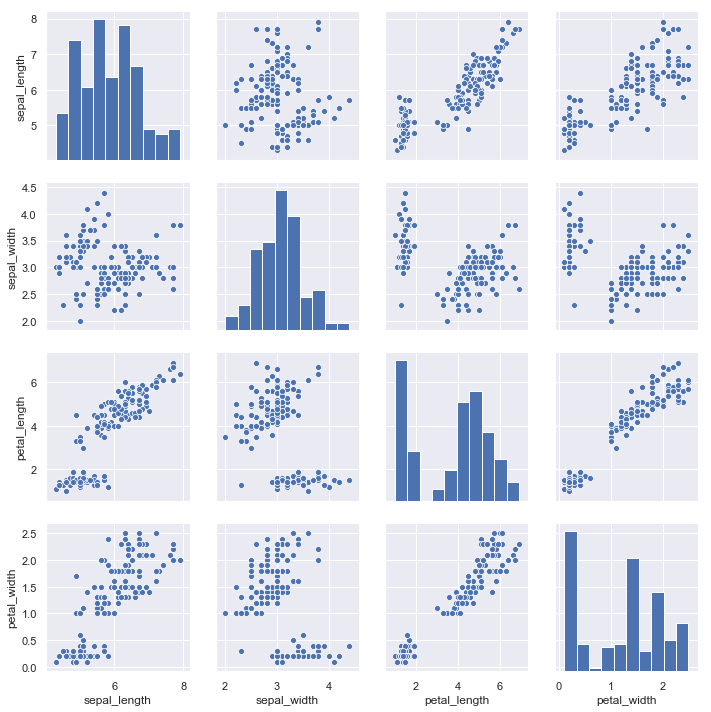

In [24]:
sns.pairplot(X)

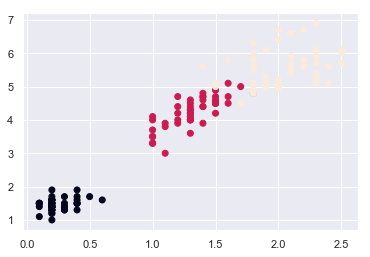

In [25]:
plt.scatter(iris['petal_width'], iris['petal_length'], c=iris['species_label'])

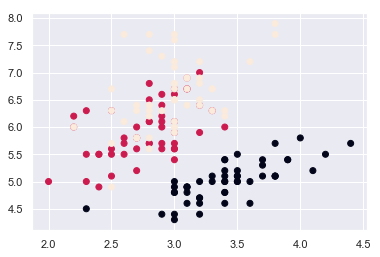

In [26]:
plt.scatter(iris['sepal_width'], iris['sepal_length'], c=iris['species_label'])

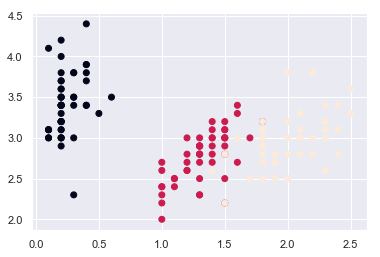

In [27]:
plt.scatter(iris['petal_width'], iris['sepal_width'], c=iris['species_label'])